# Lab 2: Cluster analysis of sequential data

## About the dataset

In this lab, we are going to use the built-in `biofam` data set from the `TraMineR` package. See more details [here](http://traminer.unige.ch/doc/biofam.html)

This data consists information about the Family life states from the Swiss Household Panel biographical survey. 16 year-long family life sequences built from the retrospective biographical survey carried out by the Swiss Household Panel (SHP) in 2002.

A data frame with 2000 rows, 16 state variables, 1 id variable and 7 covariates and 2 weights variables.

The data set contains (in columns 10 to 25) sequences of family life states from age 15 to 30 (sequence length is 16) and a series of covariates. The sequences are a sample of 2000 sequences of those created from the SHP biographical survey. It includes only individuals who were at least 30 years old at the time of the survey. The biofam data set describes family life courses of 2000 individuals born between 1909 and 1972.

The states numbered from 0 to 7 are defined from the combination of five basic states, namely Living with parents (Parent), Left home (Left), Married (Marr), Having Children (Child), Divorced:

0 = "Parent"  
1 = "Left"  
2 = "Married"  
3 = "Left+Marr"  
4 = "Child"  
5 = "Left+Child"  
6 = "Left+Marr+Child"  
7 = "Divorced"  

| Variable | Label                                          |
|----------|------------------------------------------------|
| idhous   | ID                                             |
| sex      | sex                                            |
| birthy   | birth year                                     |
| nat102   | nationality                                    |
| plingu02 | interview language                             |
| p02r01   | confession or religion                         |
| p02r04   | participation in religious services: frequency |
| cspfaj   | Swiss socio-professional category: Fathers job |
| cspmoj   | Swiss socio-professional category: Mothers job |
| a15      | family status at age 15                        |
| ...      |                                                |
| a30      | family status at age 30                        |


In [1]:
library(tidyverse)
library(TraMineR)
library(cluster)
data(biofam)
str(biofam)

── Attaching packages ──────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

Warning message:
“package ‘tibble’ was built under R version 4.1.1”
Warning message:
“package ‘readr’ was built under R version 4.1.1”
── Conflicts ─────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘TraMineR’ was built under R version 4.1.1”

TraMineR stable version 2.2-3 (Built: 2022-01-26)

Website: http://traminer.unige.ch

Please type 'citation("TraMineR")' for citation information.


Warning message:
“package ‘cluster’ was built under R version 4.1.1”


'data.frame':	2000 obs. of  27 variables:
 $ idhous  : num  66891 28621 57711 17501 147701 ...
 $ sex     : Factor w/ 2 levels "man","woman": 1 1 2 1 1 1 1 1 1 2 ...
 $ birthyr : num  1943 1935 1946 1918 1946 ...
 $ nat_1_02: Factor w/ 200 levels "other error",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ plingu02: Factor w/ 3 levels "french","german",..: 2 2 1 2 2 3 2 1 1 2 ...
 $ p02r01  : Factor w/ 13 levels "other error",..: 6 7 13 7 7 7 6 9 6 7 ...
 $ p02r04  : Factor w/ 14 levels "other error",..: 9 13 7 13 7 6 7 14 9 13 ...
 $ cspfaj  : Factor w/ 12 levels "active occupied but not classified",..: 7 7 7 5 NA 12 NA 11 7 7 ...
 $ cspmoj  : Factor w/ 12 levels "active occupied but not classified",..: 7 NA 9 NA NA NA NA NA 7 NA ...
 $ a15     : num  0 0 0 0 0 0 0 0 0 1 ...
 $ a16     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ a17     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ a18     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ a19     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ a20     : num  0 1 0 1 1 0 0 0 0 1 ...
 $ a21     : num  0

In [2]:
# state labels
bfstates <- c("Parent", "Left", "Married", "Left+Marr", "Child", "Left+Child", "Left+Marr+Child", "Divorced")

# define sequence object
biofam.seq <- seqdef(biofam, 10:25, states = bfstates, labels = bfstates)


 [>] state coding:

       [alphabet]  [label]         [long label] 

     1  0           Parent          Parent

     2  1           Left            Left

     3  2           Married         Married

     4  3           Left+Marr       Left+Marr

     5  4           Child           Child

     6  5           Left+Child      Left+Child

     7  6           Left+Marr+Child Left+Marr+Child

     8  7           Divorced        Divorced

 [>] 2000 sequences in the data set

 [>] min/max sequence length: 16/16



## Q1. Create a normalized dissimilarity matrix using Longest Common Subsequences method

Store the dissimilarity matrix in `biofam.seq.LCS`

In [3]:
biofam.seq.LCS <- NULL

# BEGIN SOLUTION
biofam.seq.LCS <- seqdist(biofam.seq, method='LCS', norm = 'auto')
biofam.seq.LCS

# END SOLUTION

 [>] 2000 sequences with 8 distinct states

 [>] creating a 'sm' with a substitution cost of 2

 [>] creating 8x8 substitution-cost matrix using 2 as constant value

 [>] 537 distinct  sequences 

 [>] min/max sequence lengths: 16/16

 [>] computing distances using the LCS gmean normalized metric

 [>] elapsed time: 0.296 secs



,1167,514,1013,275,2580,773,1187,47,2091,1846,⋯,278,1980,787,1120,59,629,2297,775,2522,719
1167,0.0000,0.6250,0.3125,0.6875,0.5000,0.4375,0.4375,0.4375,0.1250,0.6250,⋯,0.4375,0.6875,0.4375,0.3750,0.4375,0.2500,0.5625,0.4375,0.8125,0.2500
514,0.6250,0.0000,0.3750,0.3125,0.2500,0.9375,0.9375,0.4375,0.6875,0.1875,⋯,0.9375,0.3125,0.8125,0.8750,0.9375,0.5000,0.2500,0.9375,0.9375,0.6875
1013,0.3125,0.3750,0.0000,0.3750,0.1875,0.5625,0.5625,0.1250,0.3750,0.5000,⋯,0.5625,0.3750,0.4375,0.5000,0.5625,0.2500,0.3125,0.5625,0.8125,0.4375
275,0.6875,0.3125,0.3750,0.0000,0.1875,0.6875,0.6875,0.3750,0.6875,0.4375,⋯,0.6875,0.0000,0.5625,0.6875,0.6875,0.5000,0.5000,0.6875,0.8125,0.6875
2580,0.5000,0.2500,0.1875,0.1875,0.0000,0.6875,0.6875,0.2500,0.5000,0.3125,⋯,0.6875,0.1875,0.5625,0.6250,0.6875,0.3125,0.3125,0.6875,0.8125,0.5000
773,0.4375,0.9375,0.5625,0.6875,0.6875,0.0000,0.4375,0.6250,0.3125,1.0000,⋯,0.0000,0.6875,0.1250,0.0625,0.1875,0.6250,0.8750,0.0000,0.8125,0.6250
1187,0.4375,0.9375,0.5625,0.6875,0.6875,0.4375,0.0000,0.6250,0.4375,1.0000,⋯,0.4375,0.6875,0.4375,0.4375,0.2500,0.6250,0.8750,0.4375,0.3750,0.6250
47,0.4375,0.4375,0.1250,0.3750,0.2500,0.6250,0.6250,0.0000,0.5000,0.5625,⋯,0.6250,0.3750,0.5000,0.5625,0.6250,0.3125,0.2500,0.6250,0.8125,0.5000
2091,0.1250,0.6875,0.3750,0.6875,0.5000,0.3125,0.4375,0.5000,0.0000,0.6875,⋯,0.3125,0.6875,0.3125,0.2500,0.3125,0.3125,0.6250,0.3125,0.8125,0.3125
1846,0.6250,0.1875,0.5000,0.4375,0.3125,1.0000,1.0000,0.5625,0.6875,0.0000,⋯,1.0000,0.4375,0.8750,0.9375,1.0000,0.3750,0.3750,1.0000,1.0000,0.5625


## Q2. Plot the pairs of sequences

- Plot the top 5 sequences that are the most similar to sequence 1
- Plot the top 5 sequences that are the least similar to sequence 1

In [4]:
most_sim <- head(which(biofam.seq.LCS==min(biofam.seq.LCS), arr.ind=T))
most_sim
least_sim <- head(which(biofam.seq.LCS==max(biofam.seq.LCS), arr.ind=T))
least_sim

,row,col
1167,1,1
1746,39,1
2577,284,1
478,767,1
480,805,1
2380,919,1


,row,col
2304,443,1
2395,602,1
909,872,1
821,1461,1
769,1546,1
1012,1723,1


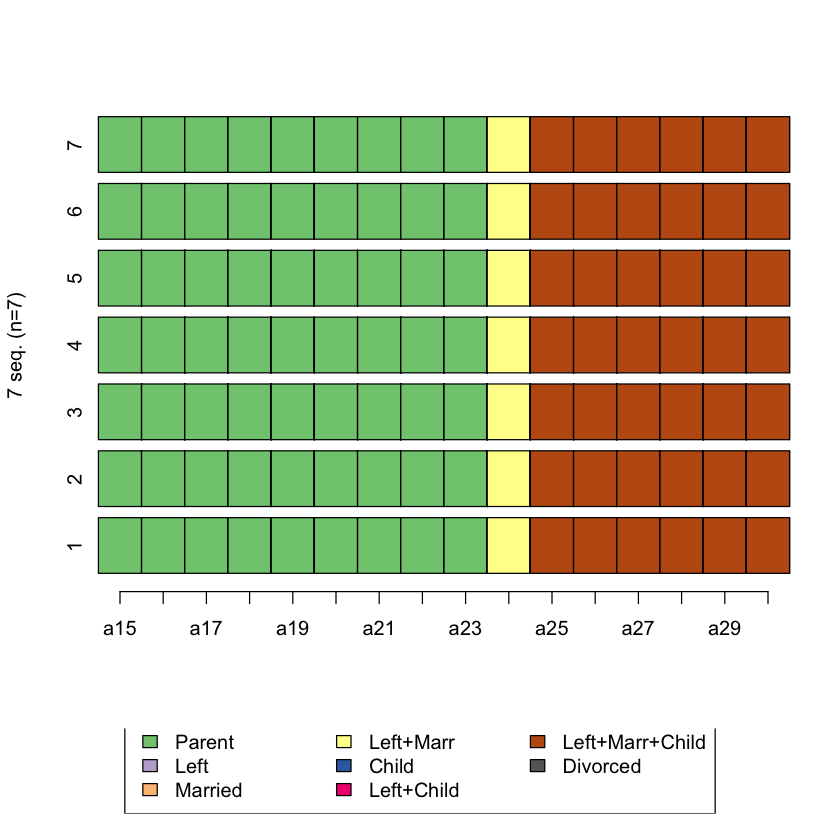

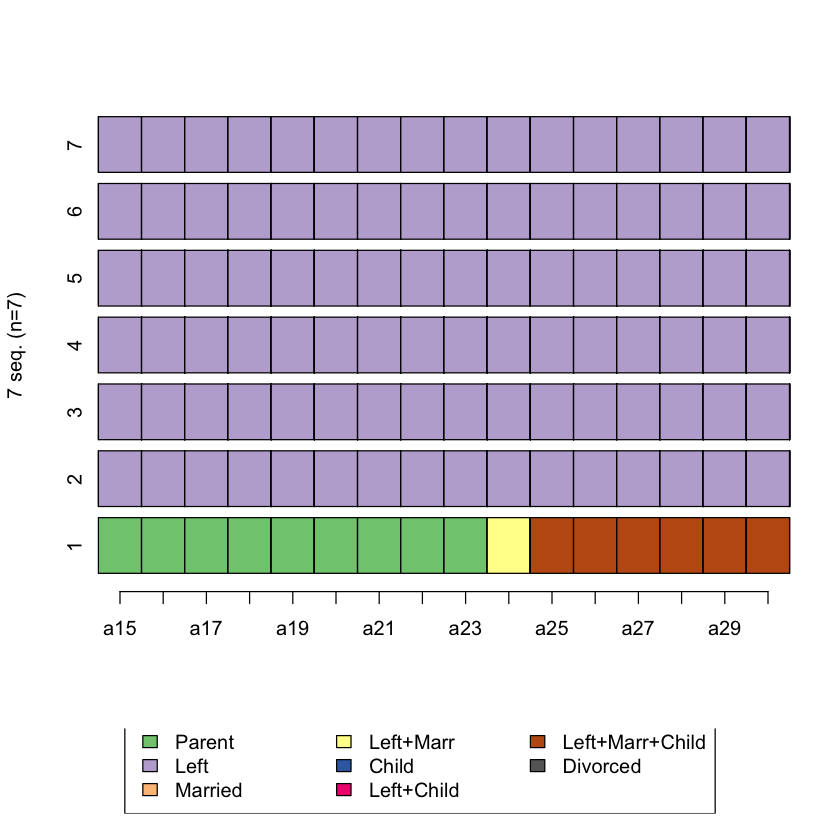

In [5]:
# BEGIN SOLUTION
seqiplot(biofam.seq[c(1,most_sim[,1]),])
seqiplot(biofam.seq[c(1,least_sim[,1]),])

# END SOLUTION

## Q3. Create a dissimilarity matrix using optimal matching using transition rates as substitution cost matrix

In [6]:
biofam.seq.subcost <- NULL
biofam.seq.OM <- NULL

# BEGIN SOLUTION
biofam.seq.subcost <- seqcost(biofam.seq, method = "TRATE")
biofam.seq.OM <- seqdist(biofam.seq, method='OM', sm=biofam.seq.subcost$sm)
biofam.seq.OM

# END SOLUTION

 [>] creating substitution-cost matrix using transition rates ...

 [>] computing transition probabilities for states Parent/Left/Married/Left+Marr/Child/Left+Child/Left+Marr+Child/Divorced ...

 [>] 2000 sequences with 8 distinct states

 [>] checking 'sm' (size and triangle inequality)

 [>] 537 distinct  sequences 

 [>] min/max sequence lengths: 16/16

 [>] computing distances using the OM metric

 [>] elapsed time: 0.151 secs



,1167,514,1013,275,2580,773,1187,47,2091,1846,⋯,278,1980,787,1120,59,629,2297,775,2522,719
1167,0.000000,19.563325,9.890831,21.562411,15.630326,13.901396,13.92295,13.437363,3.957049,19.309299,⋯,13.901396,21.562411,13.878381,11.912527,13.901428,7.636805,17.241790,13.901396,25.83089,7.767166
514,19.563325,0.000000,11.727078,9.916578,7.890831,29.377814,29.50852,13.328194,21.254715,5.777920,⋯,29.377814,9.916578,25.563325,27.388945,29.377846,15.482360,7.695148,29.377814,29.83603,21.414446
1013,9.890831,11.727078,0.000000,11.739494,5.807409,17.661866,17.84715,3.800558,11.559582,15.582221,⋯,17.661866,11.739494,13.836247,15.672997,17.661899,7.755282,9.945416,17.661866,25.89494,13.676236
275,21.562411,9.916578,11.739494,0.000000,5.932086,21.399572,21.78166,11.649872,21.559303,13.954724,⋯,21.399572,0.000000,17.508741,21.431519,21.563325,15.786949,15.643672,21.399572,25.96931,21.719034
2580,15.630326,7.890831,5.807409,5.932086,0.000000,21.529933,21.74830,7.579129,15.627218,9.945416,⋯,21.529933,5.932086,17.672494,19.541064,21.529966,9.854863,9.833155,21.529933,25.93595,15.786949
773,13.901396,29.377814,17.661866,21.399572,21.529933,0.000000,13.89259,19.609357,9.944347,31.430826,⋯,0.000000,21.399572,3.890831,1.988869,5.953968,19.758332,27.500692,0.000000,25.80053,19.888693
1187,13.922955,29.508520,17.847146,21.781663,21.748303,13.892592,0.00000,19.783030,13.913712,31.430901,⋯,13.892592,21.781663,13.923280,13.896816,7.938624,19.758407,27.565217,13.892592,11.90794,19.888768
47,13.437363,13.328194,3.800558,11.649872,7.579129,19.609357,19.78303,0.000000,15.128752,17.183336,⋯,19.609357,11.649872,15.836247,17.620488,19.630873,9.356397,7.945416,19.609357,25.90075,15.288483
2091,3.957049,21.254715,11.559582,21.559303,15.627218,9.944347,13.91371,15.128752,0.000000,21.486480,⋯,9.944347,21.559303,9.921332,7.955477,9.944379,9.813986,19.377592,9.944347,25.82165,9.944347
1846,19.309299,5.777920,15.582221,13.954724,9.945416,31.430826,31.43090,17.183336,21.486480,0.000000,⋯,31.430826,13.954724,27.617910,29.441957,31.430859,11.672494,11.209083,31.430826,31.75841,17.604580


In [12]:
?seqdist

seqdist {TraMineR},R Documentation
seqdata,State sequence object of class stslist. The sequence data to use. Use seqdef to create such an object.
method,"String. The dissimilarity measure to use. It can be ""OM"", ""OMloc"", ""OMslen"", ""OMspell"", ""OMstran"", ""HAM"", ""DHD"", ""CHI2"", ""EUCLID"", ""LCS"", ""LCP"", ""RLCP"", ""NMS"", ""NMSMST"", ""SVRspell"", or ""TWED"". See the Details section."
refseq,"NULL, Integer, State Sequence Object, or List. Default: NULL. The baseline sequence to compute the distances from. When an integer, the index of a sequence in seqdata or 0 for the most frequent sequence. When a state sequence object, it must contain a single sequence and have the same alphabet as seqdata. When a list, it must be a list of two sets of indexes of seqdata rows."
norm,"String. Default: ""none"". The normalization to use when method is one of ""OM"", ""OMloc"", ""OMslen"", ""OMspell"", ""OMstran"", ""TWED"", ""HAM"", ""DHD"", ""LCS"", ""LCP"", ""RLCP"", ""CHI2"", ""EUCLID"". It can be ""none"", ""auto"", or, except for ""CHI2"" and ""EUCLID"", ""maxlength"", ""gmean"", ""maxdist"", or ""YujianBo"". ""auto"" is equivalent to ""maxlength"" when method is one of ""OM"", ""HAM"", or ""DHD"", to ""gmean"" when method is one of ""LCS"", ""LCP"", or ""RLCP"", to YujianBo when method is one of ""OMloc"", ""OMslen"", ""OMspell"", ""OMstran"", ""TWED"". See the Details section."
indel,"Double, Vector of Doubles, or String. Default: ""auto"". Insertion/deletion cost(s). Applies when method is one of ""OM"", ""OMslen"", ""OMspell"", or ""OMstran"". The single state-independent insertion/deletion cost when a double. The state-dependent insertion/deletion costs when a vector of doubles. The vector should contain an indel cost by state in the order of the alphabet. When ""auto"", the indel is set as max(sm)/2 when sm is a matrix and is computed by means of seqcost when sm is a string specifying a cost method."
sm,"NULL, Matrix, Array, or String. Substitution costs. Default: NULL. The substitution-cost matrix when a matrix and method is one of ""OM"", ""OMloc"", ""OMslen"", ""OMspell"", ""OMstran"", ""HAM"", or ""TWED"". The series of the substitution-cost matrices when an array and method = ""DHD"". They are grouped in a 3-dimensional array with the third index referring to the position in the sequence. One of the strings ""CONSTANT"", ""INDELS"", ""INDELSLOG"", or ""TRATE"". Designates a seqcost method to build sm. ""CONSTANT"" is not relevant for ""DHD"". sm is mandatory when method is one of ""OM"", ""OMloc"", ""OMslen"", ""OMspell"", ""OMstran"", or ""TWED"". sm is autogenerated when method is one of ""HAM"" or ""DHD"" and sm = NULL. See the Details section. Note: With method = ""NMS"" or method = ""SVRspell"", use prox instead."
with.missing,"Logical. Default: FALSE. Should the non-deleted missing value be added to the alphabet as an additional state? If FALSE and seqdata or refseq contains such gaps, an error is raised."
full.matrix,"Logical. Default: TRUE. When refseq = NULL, if TRUE, the full distance matrix is returned, if FALSE, an object of class dist is returned, that is, a vector containing only values from the upper triangle of the distance matrix. Objects of class dist are smaller and can be passed directly as arguments to most clustering functions."
kweights,"Vector of Doubles. Default: vector of 1.0. The weights applied to subsequences when method is one of ""NMS"", ""NMSMST"", or ""SVRspell"". It contains at position k the weight applied to the subsequences of length k. It must be positive. Its length must be equal to the number of columns of seqdata."
tpow,"Double. Default: 1.0. The exponential weight of spell length when method is one of ""OMspell"", ""NMSMST"", or ""SVRspell""."


## Q4. Perform an agglomerative clustering using ward linkage method

- You should use the dissimilarity matrix with optimal matching generated in Q3
- Plot the dendogram

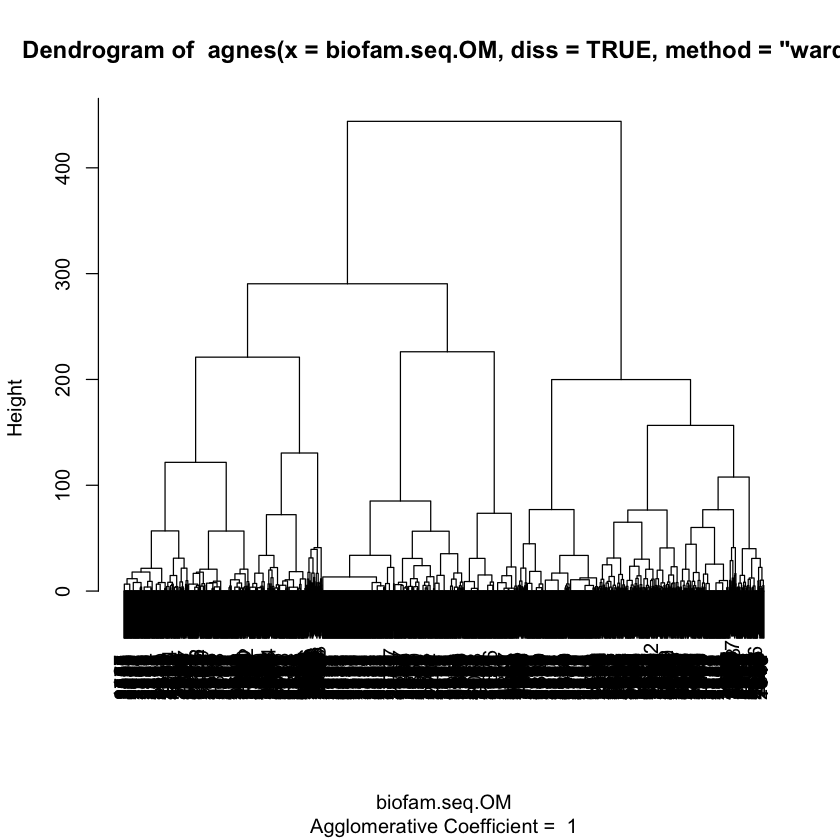

In [7]:
clusterward <- NULL

# BEGIN SOLUTION

clusterward <- agnes(biofam.seq.OM, diss = TRUE, method = "ward")

# Run this to generate the dendogram
plot(clusterward, which.plot=2)

# END SOLUTION

## Q5: Select clusters

- Cut the dendogram tree as appropriate using the `cutree()` function
- List the number of observations in each cluster
- Plot the sequence frequency by cluster membership (hint: `seqfplot()`)
- Plot the state distribution by cluster membership (hint: `seqdplot()`)

In [9]:
# BEGIN SOLUTION

# cut the dendogram tree to generate two clusters
cluster5 <- cutree(clusterward, k = 5)

# check the number of observations in each cluster
table(cluster5)

# plot sequence frequency by cluster membership
seqfplot(biofam.seq, group = cluster5, pbarw = T)

# plot state distribution by cluster membership
seqdplot(biofam.seq, group = cluster5)

# END SOLUTION


s1 = Read (2) - Write (2)
s2 = Read(5) - Write (5)

In [10]:
?seqcost()

seqcost {TraMineR},R Documentation
seqdata,A sequence object as returned by the seqdef function.
method,"String. How to generate the costs. One of ""CONSTANT"" (same cost for all substitutions), ""TRATE"" (derived from the observed transition rates), ""FUTURE"" (Chi-squared distance between conditional state distributions lag positions ahead), ""FEATURES"" (Gower distance between state features), ""INDELS"", ""INDELSLOG"" (based on estimated indel costs)."
cval,"Scalar. For method ""CONSTANT"", the single substitution cost. For method ""TRATE"", a base value from which transition probabilities are subtracted. If NULL, cval=2 is used, unless transition is ""both"" and time.varying is TRUE, in which case cval=4."
with.missing,"Logical. Should an additional entry be added in the matrix for the missing states? If TRUE, the ‘missing’ state is also added to the alphabet. Set as TRUE if you want to use the costs for distances between sequences containing non deleted (non void) missing values. Forced as FALSE when there are no non-void missing values in seqdata. See Gabadinho et al. (2010) for more details on the options for handling missing values when creating the state sequence object with seqdef."
miss.cost,Scalar or vector. Cost for substituting the missing state. Default is cval.
miss.cost.fixed,"Logical. Should the substitution cost for missing be set as the miss.cost value. When NULL (default) it will be set as FALSE when method = ""INDELS"" or ""INDELSLOG"", and TRUE otherwise."
time.varying,"Logical. If TRUE return an array with a distinct matrix for each time unit. Time is the third dimension (subscript) of the returned array. Time varying works only with method='CONSTANT', 'TRATE', 'INDELS', and 'INDELSLOG'."
weighted,Logical. Should weights in seqdata be used when applicable?
transition,"String. Only used if method=""TRATE"" and time.varying=TRUE. On which transition are rates based? Should be one of ""previous"" (from previous state), ""next"" (to next state) or ""both""."
lag,Integer. For methods TRATE and FUTURE only. Time ahead to which transition rates are computed (default is lag=1).
